<a href="https://colab.research.google.com/github/Gilbert9172/AI_Project/blob/main/%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8_XGBRegressor_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install & Import

In [ ]:
!pip install category_encoders

     |████████████████████████████████| 81kB 4.6MB/s 


In [ ]:
! pip install eli5

     |████████████████████████████████| 112kB 8.0MB/s 


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 전처리

In [ ]:
import pandas.util.testing as tm
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from category_encoders import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline

from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import TransformedTargetRegressor
from xgboost import XGBRegressor

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.metrics import mean_squared_log_error
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import eli5
from eli5.sklearn import PermutationImportance

from scipy.stats import randint,uniform
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
# 수집한 자료에서 train, test 미리 분리

FIFA_train = ('/content/drive/MyDrive/Section2/Project/csv_file/FIFA_train.csv')
FIFA_test = ('/content/drive/MyDrive/Section2/Project/csv_file/FIFA_test.csv')

train = pd.read_csv(FIFA_train, encoding = 'utf-8')
test = pd.read_csv(FIFA_test, encoding = 'utf-8')

train.shape, test.shape

((8932, 12), (3828, 11))

Train 전처리

In [ ]:
# train Data 년도 통일 
def contract(col):

    for i in train[col]:

        if i == 'Jun 30, 2019':
            train.contract_until.replace('Jun 30, 2019', '2019', inplace=True)

        elif i == 'Jun 30, 2020':
            train.contract_until.replace('Jun 30, 2020', '2020', inplace=True)

        elif i == 'Dec 31, 2018':
            train.contract_until.replace('Dec 31, 2018', '2018', inplace=True)
    
        elif i == 'Jun 30, 2020':
            train.contract_until.replace('Jun 30, 2020', '2020', inplace=True)
    
        elif i == 'May 31, 2019':
            train.contract_until.replace('May 31, 2019', '2019', inplace=True)

        elif i == 'May 31, 2020':
            train.contract_until.replace('May 31, 2020', '2020', inplace=True)

        elif i == 'Jan 31, 2019':
            train.contract_until.replace('Jan 31, 2019', '2019', inplace=True)

        elif i == 'Jan 1, 2019':
            train.contract_until.replace('Jan 1, 2019', '2019', inplace=True)

        elif i == 'Jan 12, 2019':
            train.contract_until.replace('Jan 12, 2019', '2019', inplace=True)

        else:
            i==i

    return train[col].astype(int)

train['contract_until'] = contract('contract_until')

# 계약만료 : 0 , 계약미만료 :1

contract_Y_N = []

for i in train['contract_until']:

    if i > 2020:
        contract_Y_N.append(1)

    else:
        contract_Y_N.append(0)

train['contract_until'] = pd.Series(contract_Y_N)

# continent : LabelEncoder
label = LabelEncoder()

train['continent'] = label.fit_transform(train['continent'])
train['position'] = label.fit_transform(train['position'])

# prefer_foot : OneHotEncoder
onehot = OrdinalEncoder()

train['prefer_foot'] = onehot.fit_transform(train['prefer_foot'])

# Convert float to int
train['reputation'] = train['reputation'].astype(int)

# 데이터 확인
train

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value
0,0,L. Messi,31,4,1,3,1,5,94,94,4.0,110500000.0
1,3,De Gea,27,2,0,1,2,4,91,93,1.0,72000000.0
2,7,L. Suárez,31,4,1,3,2,5,91,91,3.0,80000000.0
3,8,Sergio Ramos,32,2,0,0,2,4,91,91,3.0,51000000.0
4,9,J. Oblak,25,2,1,1,2,3,90,93,1.0,68000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8927,16925,S. Adewusi,18,0,0,2,2,1,48,63,3.0,60000.0
8928,16936,C. Ehlich,19,2,0,0,2,1,47,59,2.0,40000.0
8929,16941,N. Fuentes,18,4,1,0,2,1,47,64,2.0,50000.0
8930,16942,J. Milli,18,2,1,1,2,1,47,65,1.0,50000.0


Test 전처리

In [ ]:
# Test Data 년도 통일
def contract(col):

    for i in test[col]:

        if i == 'Jun 30, 2019':
            test.contract_until.replace('Jun 30, 2019', '2019', inplace=True)

        elif i == 'Jun 30, 2020':
            test.contract_until.replace('Jun 30, 2020', '2020', inplace=True)

        elif i == 'Dec 31, 2018':
            test.contract_until.replace('Dec 31, 2018', '2018', inplace=True)
        
        elif i == 'Dec 31, 2019':
            test.contract_until.replace('Dec 31, 2019', '2019', inplace=True)
    
        elif i == 'Jun 30, 2020':
            test.contract_until.replace('Jun 30, 2020', '2020', inplace=True)
    
        elif i == 'May 31, 2019':
            test.contract_until.replace('May 31, 2019', '2019', inplace=True)

        elif i == 'May 31, 2020':
            test.contract_until.replace('May 31, 2020', '2020', inplace=True)

        elif i == 'Jan 31, 2019':
            test.contract_until.replace('Jan 31, 2019', '2019', inplace=True)

        elif i == 'Jun 1, 2019':
            test.contract_until.replace('Jun 1, 2019', '2019', inplace=True)

        elif i == 'Jan 1, 2019':
            test.contract_until.replace('Jan 1, 2019', '2019', inplace=True)

        else:
            i==i

    return test[col].astype(int)

test['contract_until'] = contract('contract_until')

# 계약만료 : 0 , 계약미만료 :1

contract_test = []

for i in test['contract_until']:

    if i > 2020:
        contract_test.append(1)

    else:
        contract_test.append(0)

test['contract_until'] = pd.Series(contract_test)

# continent : LabelEncoder
test['continent'] = label.fit_transform(test['continent'])
test['position'] = label.fit_transform(test['position'])

# prefer_foot : OneHotEncoder
test['prefer_foot'] = onehot.fit_transform(test['prefer_foot'])

# Convert float to int
test['reputation'] = test['reputation'].astype(int)

# 나이 3살 추가
# test['age'] = test['age'] + 3 

# 데이터 확인
test

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves
0,1,Cristiano Ronaldo,33,2,1,3,2,5,94,94,5.0
1,2,Neymar Jr,26,4,1,3,2,5,92,93,5.0
2,4,K. De Bruyne,27,2,1,2,2,4,91,92,4.0
3,5,E. Hazard,27,2,0,3,2,4,91,91,4.0
4,6,L. Modrić,32,2,0,2,2,4,91,91,4.0
...,...,...,...,...,...,...,...,...,...,...,...
3823,16924,R. Takae,20,1,1,2,2,1,48,63,2.0
3824,16929,L. Wahlstedt,18,2,0,1,2,1,48,65,1.0
3825,16932,Y. Góez,18,4,1,2,2,1,48,65,2.0
3826,16937,A. Kaltner,18,2,0,3,2,1,47,61,2.0


In [ ]:
train_id_name = train[['id','name']]
train_id_name

,id,name
0,0,L. Messi
1,3,De Gea
2,7,L. Suárez
3,8,Sergio Ramos
4,9,J. Oblak
...,...,...
8927,16925,S. Adewusi
8928,16936,C. Ehlich
8929,16941,N. Fuentes
8930,16942,J. Milli


In [ ]:
test_id_name = test[['id','name']]
test_id_name

,id,name
0,1,Cristiano Ronaldo
1,2,Neymar Jr
2,4,K. De Bruyne
3,5,E. Hazard
4,6,L. Modrić
...,...,...
3823,16924,R. Takae
3824,16929,L. Wahlstedt
3825,16932,Y. Góez
3826,16937,A. Kaltner


In [ ]:
# 선수별 ID가 있기 때문에 col = name 제거
train.drop(['id','name'],axis=1,inplace=True)
test.drop(['id','name'],axis=1,inplace=True)

In [ ]:
# dtypes확인
train.dtypes

age                   int64
continent             int64
contract_until        int64
position              int64
prefer_foot           int64
reputation            int64
stat_overall          int64
stat_potential        int64
stat_skill_moves    float64
value               float64
dtype: object

In [ ]:
# id = high cardinality
# train['id'] = train['id'].astype(str)

In [ ]:
# 결측치 확인 
train.isnull().sum()

age                 0
continent           0
contract_until      0
position            0
prefer_foot         0
reputation          0
stat_overall        0
stat_potential      0
stat_skill_moves    0
value               0
dtype: int64

In [ ]:
train1, val = train_test_split(train, test_size = 0.2, train_size = 0.8, random_state = 2)

features = train.columns.drop(['value'])
target = 'value'

X_train = train1[features]
y_train = train1[target]

X_val = val[features]
y_val = val[target]

In [ ]:
X_train.shape, y_train.shape,X_val.shape, y_val.shape

((7145, 9), (7145,), (1787, 9), (1787,))

# 베이스라인 모델 
- target의 평균
- RMSE : 5840654.54

In [ ]:
train.describe()[['value']]

,value
count,8.932000e+03
mean,2.778673e+06
std,5.840982e+06
min,1.000000e+04
25%,3.750000e+05
50%,8.250000e+05
75%,2.600000e+06
max,1.105000e+08


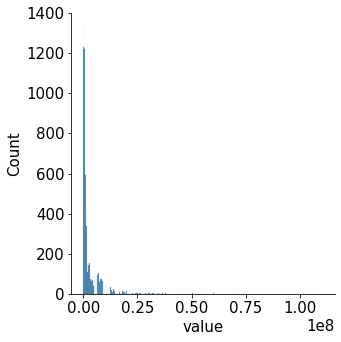

In [ ]:
# 타겟의 분포 확인 (log변환이 필요해 보인다)
sns.displot(train['value']);

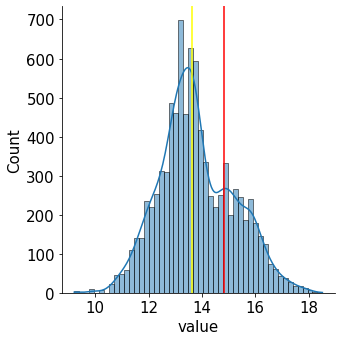

In [ ]:
sns.displot(np.log1p(train['value']),kde = True)

plt.axvline(x = np.log1p(train['value'].mean()), color = 'red');
plt.axvline(x = np.log1p(train['value'].median()), color = 'yellow');

In [ ]:
base_predict = train['value'].mean()
base_pred = [base_predict] * len(train['value'])

base_MSE = mean_squared_error(train['value'],base_pred)

print(base_predict)
print(f'MSE : {base_MSE}')

2778673.3094491716
MSE : 34113245485749.77


In [ ]:
base_RMSE = np.sqrt(base_MSE)
print(f'RMSE : {base_RMSE}')

RMSE : 5840654.542579091


In [ ]:
base_RMSLE = np.sqrt(mean_squared_log_error(train['value'],base_pred))
print(f'RMSLE : {base_RMSLE}')

RMSLE : 1.7474648756755318


# 시각화

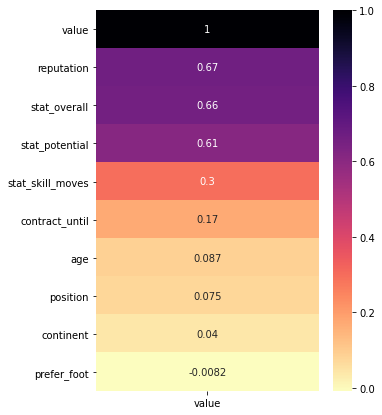

In [ ]:
# target과 다른 feature간의 상관계수 
# 뒤에 보면 알 수 있지만, 상관계수의 높고 낮음으로 특성중요도를 판단하는건 다소 성급함

plt.rcParams["figure.figsize"] = (5,7)
sns.heatmap(train.corr()[['value']].sort_values(by='value', ascending=False),annot=True, cmap="magma_r");

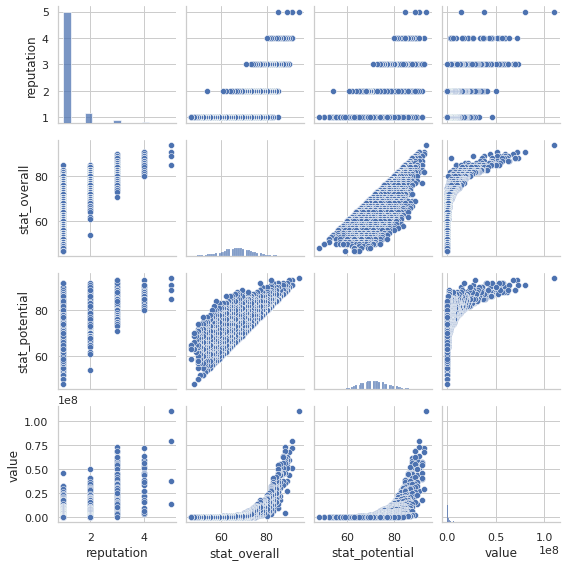

In [ ]:
# 상관계수에서 중요하다고 한 특성들에 대한 시각화
sns.set(style='whitegrid', context='notebook')

cols = ['reputation','stat_overall','stat_potential','value']
sns.pairplot(train[cols],height=2)

Text(0.5, 1.0, 'Title : Reputation')

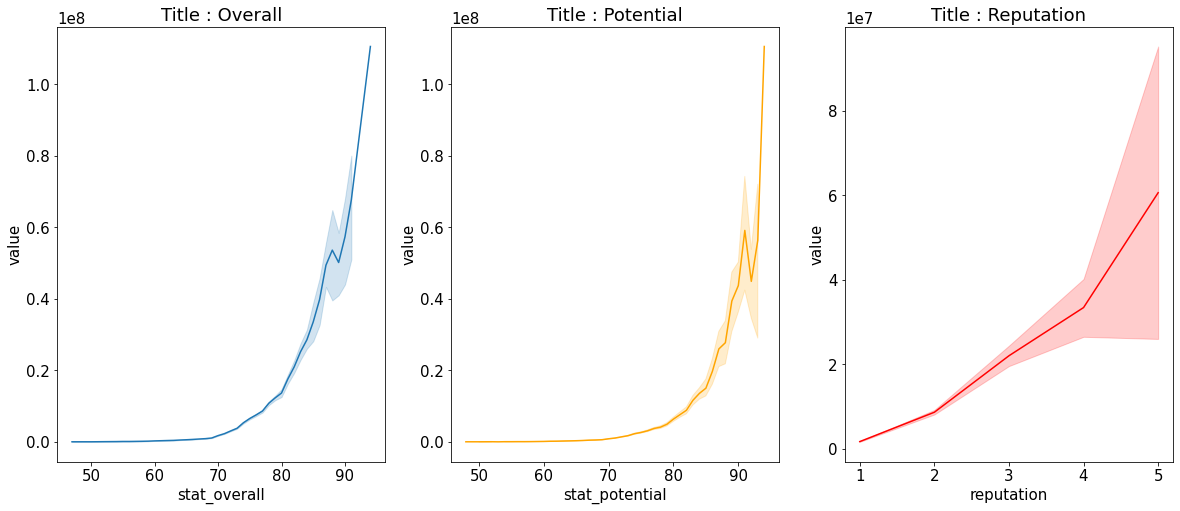

In [ ]:
fig, ax = plt.subplots(1, 3)

plt.rcParams["figure.figsize"] = (20,8)
plt.rcParams["font.size"] = 15

sns.lineplot(x = train['stat_overall'], y = train[target], ax=ax[0]);
sns.lineplot(x = train['stat_potential'], y = train[target], color='orange',ax=ax[1]);
sns.lineplot(x = train['reputation'], y = train[target], color='red',ax=ax[2]);

ax[0].set_title('Title : Overall')
ax[1].set_title('Title : Potential')
ax[2].set_title('Title : Reputation')

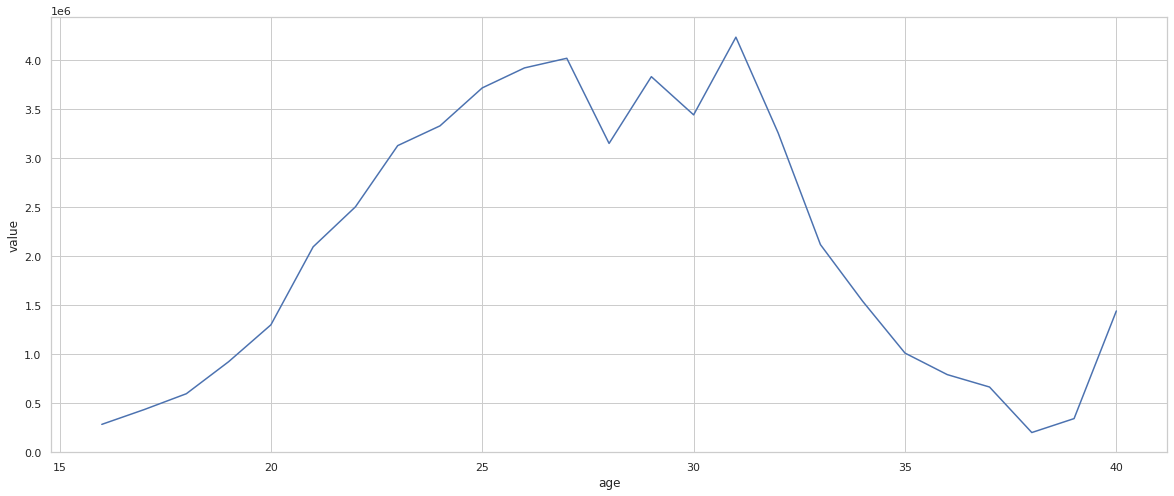

In [ ]:
# ci = None : 신뢰구간 표시 안함
sns.lineplot(x = train['age'], y = train[target], ci = None);

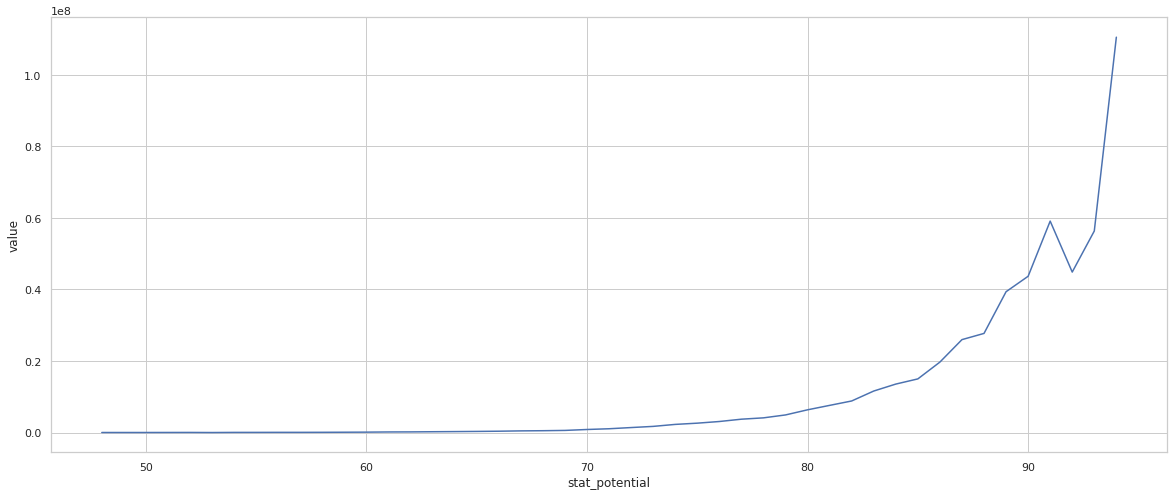

In [ ]:
# stat_potential 높을수록 몸값 비쌈 
sns.lineplot(x = train['stat_potential'], y = train[target],ci = None);

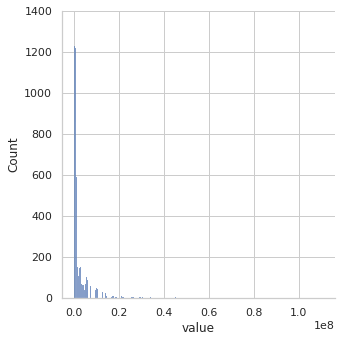

In [ ]:
sns.displot(train['value'])

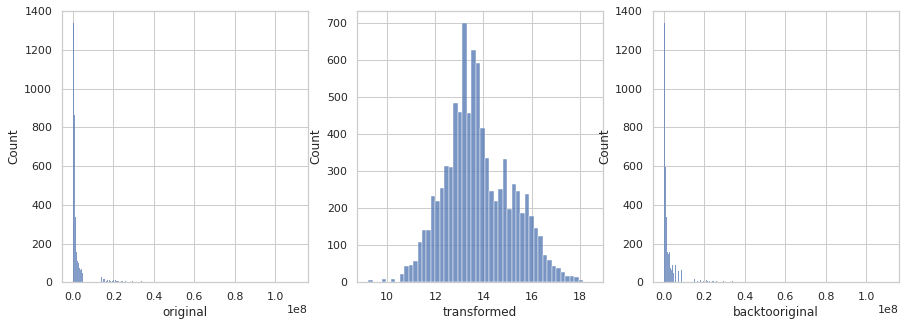

In [ ]:
plots = pd.DataFrame()
plots['original'] = train['value']
plots['transformed'] = np.log1p(train['value'])
plots['backtooriginal'] = np.expm1(np.log1p(train['value']))

fig,ax = plt.subplots(1,3, figsize = (15,5))
sns.histplot(plots['original'], ax=ax[0]);
sns.histplot(plots['transformed'], ax=ax[1]);
sns.histplot(plots['backtooriginal'], ax=ax[2]);

# XGBRegressor (모든 특성)

- RMSE_XGB : 617991.79
- R2 : 0.9898







In [ ]:
# RandomizedSearchCV 하이퍼파라미터 설정

model = XGBRegressor(objective='reg:squarederror',
                     random_state=2,
                     n_jobs=-1)

params = {'XGBRegressor__n_estimators': randint(100,300),
          'XGBRegressor__max_depth': randint(3,10),
          'XGBRegressor__subsample': uniform(0.5,1),
          'XGBRegressor__learning_rate': uniform(0.1,0.3)}

R_CV = RandomizedSearchCV(model,params,scoring="neg_mean_squared_error",
                             n_jobs = -1, verbose=1,n_iter=50,cv=5)

R_CV.fit(X_train,y_train)

print('최적 하이퍼파라미터:', R_CV.best_params_)
print('CV MSE: ', -R_CV.best_score_)
# model.fit(X_train, y_train)
# model.fit(X_train.drop(['stat_overall'],axis=1), y_train);

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   10.6s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   40.8s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   51.4s finished


최적 하이퍼파라미터: {'XGBRegressor__learning_rate': 0.15351750806493417, 'XGBRegressor__max_depth': 3, 'XGBRegressor__n_estimators': 129, 'XGBRegressor__subsample': 1.1067263770391822}
CV MSE:  561228072889.8391


In [ ]:
gilbert = XGBRegressor(n_estimators = 1000,
                       objective= 'reg:squarederror',
                       max_depth = 7,
                       learning_rate = 0.2,
                       subsample = 1,
                       random_state=2,
                       n_jobs=-1)

eval_set = [(X_train, y_train), 
            (X_val, y_val)]

gilbert.fit(X_train, y_train, 
          eval_set=eval_set,
          early_stopping_rounds=50
         )

[0]	validation_0-rmse:5.20372e+06	validation_1-rmse:5.46893e+06
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 50 rounds.
[1]	validation_0-rmse:4.25524e+06	validation_1-rmse:4.47673e+06
[2]	validation_0-rmse:3.4903e+06	validation_1-rmse:3.65867e+06
[3]	validation_0-rmse:2.87686e+06	validation_1-rmse:3.01836e+06
[4]	validation_0-rmse:2.38125e+06	validation_1-rmse:2.46704e+06
[5]	validation_0-rmse:1.97627e+06	validation_1-rmse:2.03523e+06
[6]	validation_0-rmse:1.6489e+06	validation_1-rmse:1.6909e+06
[7]	validation_0-rmse:1.38282e+06	validation_1-rmse:1.41628e+06
[8]	validation_0-rmse:1.16697e+06	validation_1-rmse:1.22298e+06
[9]	validation_0-rmse:995043	validation_1-rmse:1.07704e+06
[10]	validation_0-rmse:851723	validation_1-rmse:967832
[11]	validation_0-rmse:735980	validation_1-rmse:877473
[12]	validation_0-rmse:641302	validation_1-rmse:802493
[13]	validation_0-rmse:562958	validation_1-r

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.2, max_delta_step=0,
             max_depth=7, min_child_weight=1, missing=None, n_estimators=1000,
             n_jobs=-1, nthread=None, objective='reg:squarederror',
             random_state=2, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

In [ ]:
print(gilbert.score(X_train, y_train))
print(gilbert.score(X_val, y_val))

0.999234172281623
0.9897622460530758


In [ ]:
y_pred = gilbert.predict(X_val)

print(f'MAE_XGB : {mean_absolute_error(y_val,y_pred)}')
print(f'RMSE_XGB : {np.sqrt(mean_squared_error(y_val,y_pred))}')
# print(f'RMSLE_XGB : {np.sqrt(mean_squared_log_error(y_val,y_pred))}')

print(f'R2 : {r2_score(y_val,y_pred)}')

MAE_XGB : 150139.4867174931
RMSE_XGB : 617991.7907139942
R2 : 0.9897622460530758


k fold 교차 검증해봤지만 hold out이 더 성능이 높다

In [ ]:
# from sklearn.model_selection import cross_validate
# from sklearn.model_selection import KFold

# kfold = KFold(n_splits=6, shuffle = True, random_state=0)

# scores = cross_validate(model, X_train, y_train, cv=kfold)
# scores

In [ ]:
# scores_val = cross_validate(model, X_val, y_val, cv=kfold)
# scores_val

#  Permutation importances 

In [ ]:
# scoring : 어떤 계산 방식으로 순서를 정할지 
permuter = PermutationImportance(gilbert,
                                 scoring='neg_mean_squared_error',
                                 n_iter=10,
                                 random_state=2)

permuter.fit(X_val, y_val)

PermutationImportance(cv='prefit',
                      estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                             colsample_bylevel=1,
                                             colsample_bynode=1,
                                             colsample_bytree=1, gamma=0,
                                             importance_type='gain',
                                             learning_rate=0.2,
                                             max_delta_step=0, max_depth=7,
                                             min_child_weight=1, missing=None,
                                             n_estimators=1000, n_jobs=-1,
                                             nthread=None,
                                             objective='reg:squarederror',
                                             random_state=2, reg_alpha=0,
                                             reg_lambda=1, scale_pos_weight=1,
                               

In [ ]:
features_names = X_val.columns.tolist()
pd.Series(permuter.feature_importances_, features_names).sort_values()

contract_until     -1.589149e+10
continent           3.853647e+09
prefer_foot         6.062687e+09
reputation          1.493489e+10
stat_skill_moves    1.579176e+11
position            5.676758e+11
age                 1.936604e+12
stat_potential      2.765095e+12
stat_overall        5.609409e+13
dtype: float64

In [ ]:
# 순열 중요도 확인 
permuter.feature_importances_

array([ 1.93660407e+12,  3.85364735e+09, -1.58914927e+10,  5.67675764e+11,
        6.06268654e+09,  1.49348851e+10,  5.60940903e+13,  2.76509518e+12,
        1.57917555e+11])

In [ ]:
# 특성별 score 확인
eli5.show_weights(
    permuter, 
    top=None, # top n 지정 가능, None 일 경우 모든 특성 
    feature_names=features_names # list 형식으로 넣어야 합니다
)
# 아까 상관계수로 확인 한 특성 중요도는 age를 좋지 않은 특성으로 분류 
# 하지만 순열특성 중요도에서는 3번째 중요 특성으로 랭크

Weight,Feature
56094090325709.9922 ± 4111480369687.3672,stat_overall
2765095181966.6650 ± 206448849889.7876,stat_potential
1936604070368.3328 ± 786540931992.3063,age
567675763687.6022 ± 221234040734.2887,position
157917554878.6980 ± 74816819549.2262,stat_skill_moves
14934885070.8826 ± 7529079104.7641,reputation
6062686541.9192 ± 14949703651.8119,prefer_foot
3853647353.0228 ± 38645616290.8194,continent
-15891492671.9431 ± 57050102837.8421,contract_until


In [ ]:
print('특성 삭제 전:', X_train.shape, X_val.shape)

특성 삭제 전: (7145, 9) (1787, 9)


In [ ]:
# 0보다 작은 특성 삭제 
minimum_importance = 0
mask = permuter.feature_importances_ > minimum_importance
new_features = X_train.columns[mask]
X_train_selected = X_train[new_features]
X_val_selected = X_val[new_features]

In [ ]:
print('특성 삭제 후:', X_train_selected.shape, X_val_selected.shape)

특성 삭제 후: (7145, 8) (1787, 8)


# XGBRegressor ( contract_until 특성 제거 )

- RMSE_gilbert1 : 606765.898
- Val_R2 0.9901

In [ ]:
gilbert1 = XGBRegressor(n_estimators = 1000,
                       objective= 'reg:squarederror',
                       max_depth = 7,
                       learning_rate = 0.2,
                       subsample = 1,
                       random_state=2,
                       n_jobs=-1)

eval_set1 = [(X_train_selected, y_train), 
            (X_val_selected, y_val)]

gilbert1.fit(X_train_selected, y_train, 
          eval_set=eval_set1,
          early_stopping_rounds=200
         )

print(gilbert1.score(X_train_selected, y_train))
print(gilbert1.score(X_val_selected, y_val))

[0]	validation_0-rmse:5.20372e+06	validation_1-rmse:5.46893e+06
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 200 rounds.
[1]	validation_0-rmse:4.25524e+06	validation_1-rmse:4.47673e+06
[2]	validation_0-rmse:3.4903e+06	validation_1-rmse:3.65867e+06
[3]	validation_0-rmse:2.87686e+06	validation_1-rmse:3.01836e+06
[4]	validation_0-rmse:2.38125e+06	validation_1-rmse:2.46704e+06
[5]	validation_0-rmse:1.97627e+06	validation_1-rmse:2.03523e+06
[6]	validation_0-rmse:1.64891e+06	validation_1-rmse:1.69096e+06
[7]	validation_0-rmse:1.38318e+06	validation_1-rmse:1.40628e+06
[8]	validation_0-rmse:1.16793e+06	validation_1-rmse:1.21347e+06
[9]	validation_0-rmse:996574	validation_1-rmse:1.06955e+06
[10]	validation_0-rmse:853601	validation_1-rmse:948874
[11]	validation_0-rmse:738012	validation_1-rmse:852283
[12]	validation_0-rmse:643590	validation_1-rmse:781970
[13]	validation_0-rmse:565318	validation_

In [ ]:
y2_pred = gilbert1.predict(X_val_selected)

print(f'MAE_XGB2 : {mean_absolute_error(y_val,y2_pred)}')
print(f'RMSE_XGB2 : {np.sqrt(mean_squared_error(y_val,y2_pred))}')

print('R2', r2_score(y_val, y2_pred))

MAE_XGB2 : 145014.42863497656
RMSE_XGB2 : 606765.8982688544
R2 0.9901308078588104


# 마무리

In [ ]:
# test data 컬럼 정리
X_test= test[new_features]
X_test.columns

Index(['age', 'continent', 'position', 'prefer_foot', 'reputation',
       'stat_overall', 'stat_potential', 'stat_skill_moves'],
      dtype='object')

In [ ]:
# test data 예측
y_pred_test = gilbert1.predict(X_test)
y_pred_test 

array([8.5282696e+07, 7.8382784e+07, 7.7567480e+07, ..., 5.9998625e+04,
       5.1665543e+04, 4.9938074e+04], dtype=float32)

In [ ]:
# 예측값 (150명의 선수)
sub_sample = y_pred_test[:150]
sub_sample.mean()

28601422.0

In [ ]:
# 관측값
y_test = pd.read_csv('/content/drive/MyDrive/Section2/Project/csv_file/ytest.csv', encoding = 'utf-8')
y_test.mean()

real    2.719333e+07
dtype: float64

In [ ]:
# 정확도
print(f'R2 : {round(r2_score(y_test, sub_sample),4)}')

R2 : 0.8836


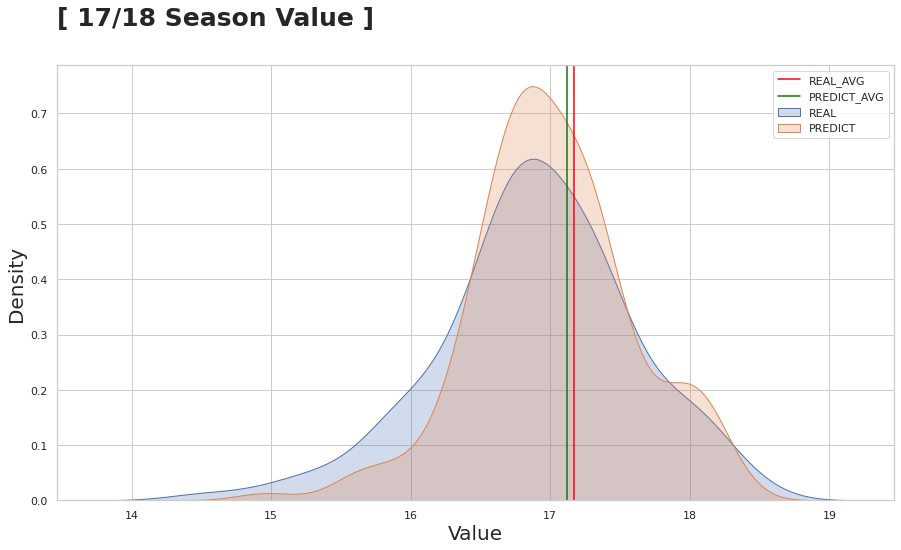

In [ ]:
plt.rcParams["figure.figsize"] = (15,8)

sns.kdeplot(data = np.log1p(y_test), x = 'real',shade=True,label="REAL")
plt.axvline(x = np.log1p(sub_sample.mean()),zorder = 1, color = 'red',label="REAL_AVG");

sns.kdeplot(data = np.log1p(sub_sample),shade=True, label="PREDICT")
plt.axvline(x = np.log1p(27193333),zorder = 1, color = 'green',label="PREDICT_AVG");


plt.title("[ 17/18 Season Value ]",fontsize = 25, fontweight = 'bold', loc='left', pad=40)
plt.xlabel("Value",fontsize = 20)
plt.ylabel("Density",fontsize = 20)

plt.legend()
plt.show();

# 관측값과 예측값의 밀도 그래프 
# 예측값과 관측값이 어느 정도 비슷한 밀도를 보여주고 있다

In [ ]:
pd.options.display.float_format = '{:.0f}'.format

sub = ('/content/drive/MyDrive/Section2/Project/csv_file/submission.csv')

submission = pd.read_csv(sub, encoding = 'utf-8')
submission['value'] = pd.Series(y_pred_test)
submission.set_index('id',inplace=True)

submission

,value
id,
1,85282696
2,78382784
4,77567480
5,79956080
6,73042256
...,...
16924,68724
16929,52287
16932,59999


In [ ]:
test1 = pd.read_csv(FIFA_test, encoding = 'utf-8')
test_final = test1.merge(submission, on ='id')
test_final[:30]

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value
0,1,Cristiano Ronaldo,33,europe,2022,ST,right,5,94,94,5,85282696
1,2,Neymar Jr,26,south america,2022,ST,right,5,92,93,5,78382784
2,4,K. De Bruyne,27,europe,2023,MF,right,4,91,92,4,77567480
3,5,E. Hazard,27,europe,2020,ST,right,4,91,91,4,79956080
4,6,L. Modrić,32,europe,2020,MF,right,4,91,91,4,73042256
5,10,R. Lewandowski,29,europe,2021,ST,right,4,90,90,4,66954476
6,11,T. Kroos,28,europe,2022,MF,right,4,90,90,3,63718036
7,15,P. Dybala,24,south america,2022,ST,left,3,89,94,4,68592640
8,17,A. Griezmann,27,europe,2023,MF,left,4,89,90,4,66093568
9,23,S. Agüero,30,south america,2021,ST,right,4,89,89,4,62533132


# SHAP
- 순열중요도랑은 다르다
- 각 특성의 영향(기여도)을 시각화

In [ ]:
!pip install shap

     |████████████████████████████████| 358kB 6.4MB/s 
  Created wheel for shap: filename=shap-0.39.0-cp37-cp37m-linux_x86_64.whl size=491617 sha256=0a8ccf4507d475954e3e3e9439e50c4b623144742595231a1129fcb703ae45bd
  Stored in directory: /root/.cache/pip/wheels/15/27/f5/a8ab9da52fd159aae6477b5ede6eaaec69fd130fa0fa59f283
Successfully built shap


In [ ]:
xtest = X_test.copy()
xtest

,age,continent,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves
0,33,2,3,2,5,94,94,5.0
1,26,4,3,2,5,92,93,5.0
2,27,2,2,2,4,91,92,4.0
3,27,2,3,2,4,91,91,4.0
4,32,2,2,2,4,91,91,4.0
...,...,...,...,...,...,...,...,...
3823,20,1,2,2,1,48,63,2.0
3824,18,2,1,2,1,48,65,1.0
3825,18,4,2,2,1,48,65,2.0
3826,18,2,3,2,1,47,61,2.0


In [ ]:
# 손흥민,산초,이강인 선수 가격 알아보기
New = pd.DataFrame({'age': [23,30,23,29],
                    'continent' : [2,1,1,2],
                    'position' : [2,3,2,0],
                    'prefer_foot' : [2,2,1,2],
                    'reputation': [4,4,3,4],
                    'stat_overall' : [92,92,80,89],
                    'stat_potential' : [92,89,85,87],
                    'stat_skill_moves' : [5,4,4,2]})
New

,age,continent,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves
0,23,2,2,2,4,92,92,5
1,30,1,3,2,4,92,89,4
2,23,1,2,1,3,80,85,4
3,29,2,0,2,4,89,87,2


In [ ]:
import shap

data = New.iloc[[3]]

explainer = shap.TreeExplainer(gilbert1)
shap_values = explainer.shap_values(data)

shap.initjs()
shap.force_plot(
    base_value = explainer.expected_value, 
    shap_values = shap_values,
    features = data
)

In [ ]:
test_final.iloc[[119]]

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value
119,385,F. Muslera,32,south america,2021,GK,right,3,81,81,1,10687126


In [ ]:
import shap

print(test_final['name'].iloc[0])

data = xtest.iloc[[0]]

explainer = shap.TreeExplainer(gilbert1)
shap_values = explainer.shap_values(data)

shap.initjs()
shap.force_plot(
    base_value = explainer.expected_value, 
    shap_values = shap_values,
    features = data
)

Cristiano Ronaldo


In [ ]:
# import shap

# explainer = shap.TreeExplainer(gilbert1)
# shap_values = explainer.shap_values(xtest)

# shap.initjs()
# shap.force_plot(
#     base_value = explainer.expected_value, 
#     shap_values = shap_values,
#     features = xtest
# )

shap.plots.force is slow for many thousands of rows, try subsampling your data.


In [ ]:
xtrain = X_train.copy()
xtrain.drop(columns=['contract_until'],inplace=True)

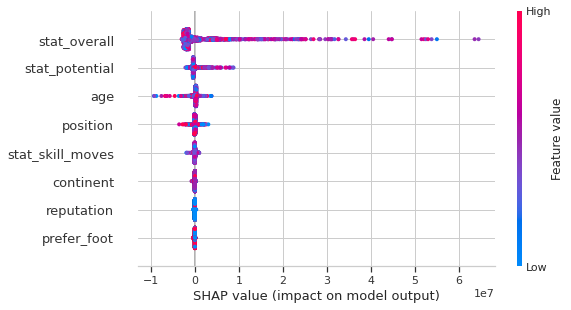

In [ ]:
import shap
explainer = shap.TreeExplainer(gilbert1)
shap_values = explainer.shap_values(xtest.sample(n = 3000))
shap.summary_plot(shap_values, xtrain.sample(n = 3000));

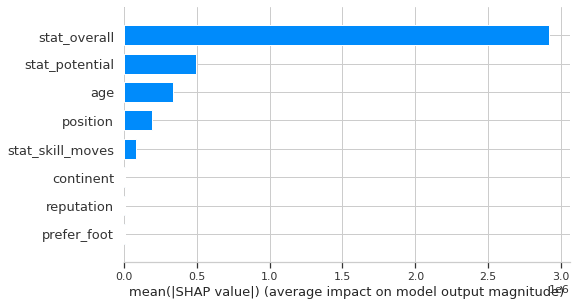

In [ ]:
# summary_plot bar version
# 오버롤이 앞도적으로 영향을 많이 준다.
shap.summary_plot(shap_values, xtrain.sample(n = 3000), plot_type="bar")

# PDP

In [ ]:
pip install pdpbox

     |████████████████████████████████| 34.0MB 91kB/s 
     |████████████████████████████████| 13.1MB 237kB/s 
  Created wheel for pdpbox: filename=PDPbox-0.2.1-cp37-none-any.whl size=35758227 sha256=a10686aa91f70127d26dccfc8f292f2b3052d2a9db6c68e4460412e1befa4166
  Stored in directory: /root/.cache/pip/wheels/c8/13/11/ecac74c6192790c94f6f5d919f1a388f927b9febb690e45eef
Successfully built pdpbox
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2


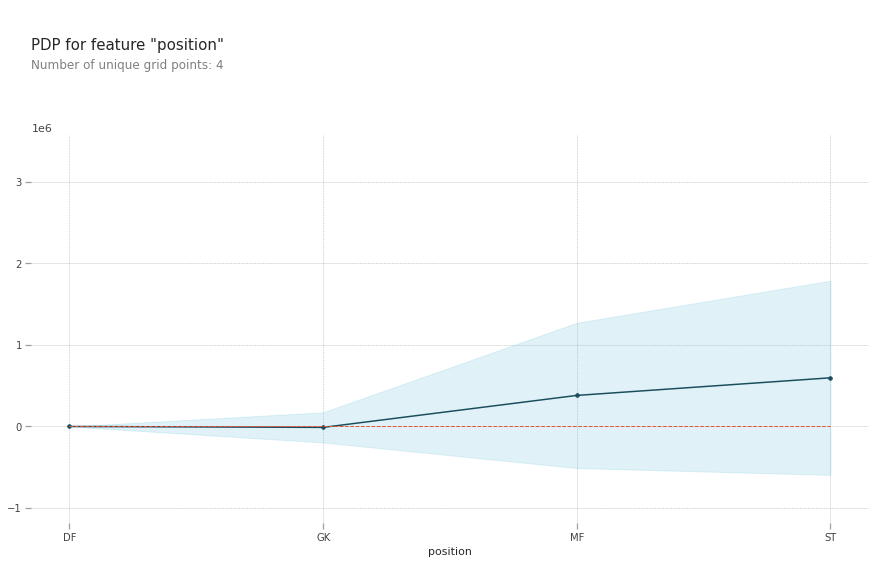

In [ ]:
from pdpbox.pdp import pdp_isolate, pdp_plot

# dd = xtest.columns.to_list()

# for x in dd:
#     isolated = pdp_isolate(
#         model= gilbert1, 
#         dataset=xtest, 
#         model_features=xtest.columns, 
#         feature=x,
#         grid_type='percentile', 
#         num_grid_points=30)
#     pdp_plot(isolated, feature_name=x);


isolated = pdp_isolate(
    model= gilbert1, 
    dataset=xtest,
    model_features=xtest.columns, 
    feature='position',
    grid_type='percentile', 
    num_grid_points=10)

pdp_plot(isolated, feature_name='position')
plt.xticks([0,1,2,3],['DF','GK','MF','ST']);

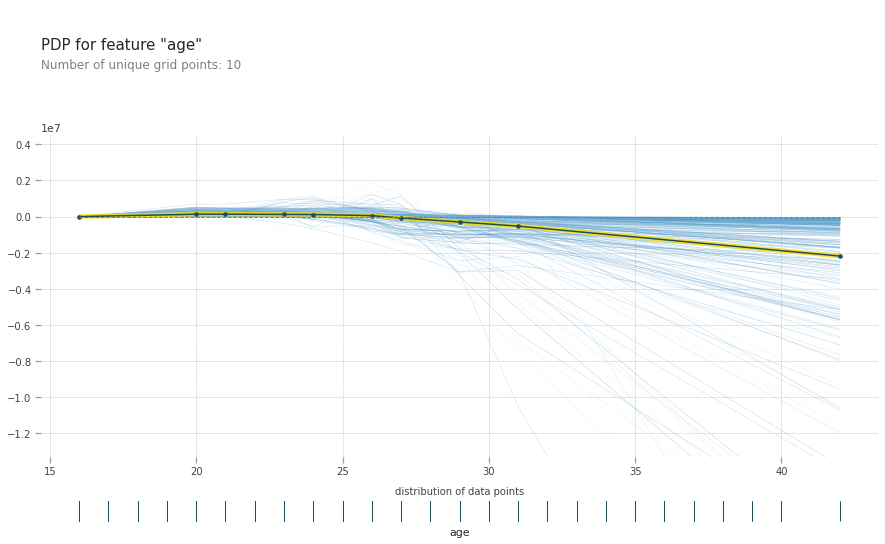

In [ ]:
pdp_plot(isolated
         , feature_name='age'
         , plot_lines=True
         , frac_to_plot=0.1 
         , plot_pts_dist=True );